,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


<Figure size 400x300 with 0 Axes>

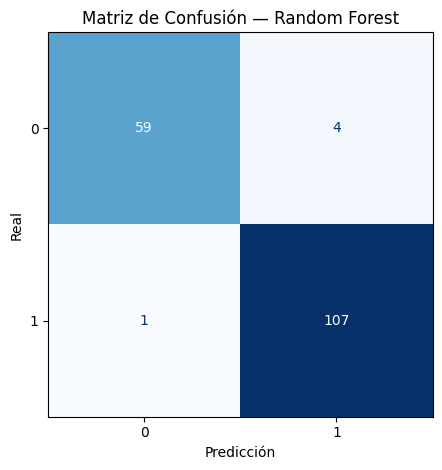

Modelo: Random Forest
Accuracy : 0.9708
Precision: 0.9640
Recall   : 0.9907
F1-Score : 0.9772

Confusion Matrix:
TP: 107, FP: 4
FN: 1, TN: 59
------------------------------ 



<Figure size 400x300 with 0 Axes>

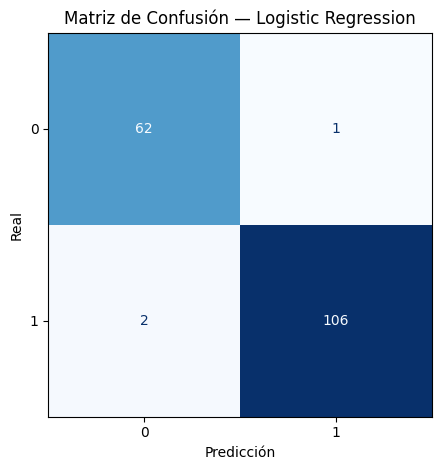

Modelo: Logistic Regression
Accuracy : 0.9825
Precision: 0.9907
Recall   : 0.9815
F1-Score : 0.9860

Confusion Matrix:
TP: 106, FP: 1
FN: 2, TN: 62
------------------------------ 



<Figure size 400x300 with 0 Axes>

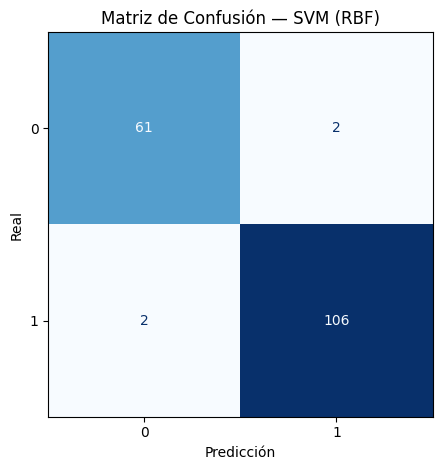

Modelo: SVM (RBF)
Accuracy : 0.9766
Precision: 0.9815
Recall   : 0.9815
F1-Score : 0.9815

Confusion Matrix:
TP: 106, FP: 2
FN: 2, TN: 61
------------------------------ 



,Modelo,Accuracy,Precision,Recall,F1,TP,FP,FN,TN
0,Logistic Regression,0.982456,0.990654,0.981481,0.986047,106,1,2,62
1,SVM (RBF),0.976608,0.981481,0.981481,0.981481,106,2,2,61
2,Random Forest,0.970760,0.963964,0.990741,0.977169,107,4,1,59


In [2]:
# =========================================================
# Clasification Metrics — Breast Cancer (sklearn) | 
# =========================================================

# 1) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 2) Datos
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
df_bc = pd.DataFrame(X, columns=cancer.feature_names).assign(target=y)
display(df_bc.head(10))

# 3) Split
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# 4) Modelos (con pipelines para escalar donde conviene)
modelos = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=10000, random_state=42)
    ),
    "SVM (RBF)": make_pipeline(
        StandardScaler(),
        SVC(random_state=42)
    ),
}

# 5) Helpers
def entrenar_y_metricas(modelo, Xtr, ytr, Xte, yte):
    """
    Entrena el modelo, predice y devuelve métricas + matriz de confusión.
    """
    modelo.fit(Xtr, ytr)
    yhat = modelo.predict(Xte)

    acc = accuracy_score(yte, yhat)
    pre = precision_score(yte, yhat)
    rec = recall_score(yte, yhat)
    f1  = f1_score(yte, yhat)

    cm = confusion_matrix(yte, yhat)
    (tn, fp), (fn, tp) = cm

    return {
        "accuracy": acc,
        "precision": pre,
        "recall": rec,
        "f1": f1,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp,
        "conf_mat": cm
    }

def graficar_cm(cm, titulo):
    plt.figure(figsize=(4, 3))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", colorbar=False)
    plt.title(f"Matriz de Confusión — {titulo}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

# 6) Loop de entrenamiento y reporte
registros = []
for nombre, modelo in modelos.items():
    res = entrenar_y_metricas(modelo, X_tr, y_tr, X_te, y_te)
    graficar_cm(res["conf_mat"], nombre)

    print(f"Modelo: {nombre}")
    print(f"Accuracy : {res['accuracy']:.4f}")
    print(f"Precision: {res['precision']:.4f}")
    print(f"Recall   : {res['recall']:.4f}")
    print(f"F1-Score : {res['f1']:.4f}")
    print("\nConfusion Matrix:")
    print(f"TP: {res['TP']}, FP: {res['FP']}")
    print(f"FN: {res['FN']}, TN: {res['TN']}")
    print("-" * 30, "\n")

    # guardo para tabla final
    registros.append({
        "Modelo": nombre,
        "Accuracy": res["accuracy"],
        "Precision": res["precision"],
        "Recall": res["recall"],
        "F1": res["f1"],
        "TP": res["TP"], "FP": res["FP"], "FN": res["FN"], "TN": res["TN"]
    })

# 7) Resumen en tabla (ordenado por F1)
tabla = pd.DataFrame(registros).sort_values("F1", ascending=False)
display(tabla.reset_index(drop=True))
